# Write a MATLAB/Python program and plot multilevel speech resolution.

C:\Users\omarf\AppData\Local\Temp\ipykernel_6592\260676844.py:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)


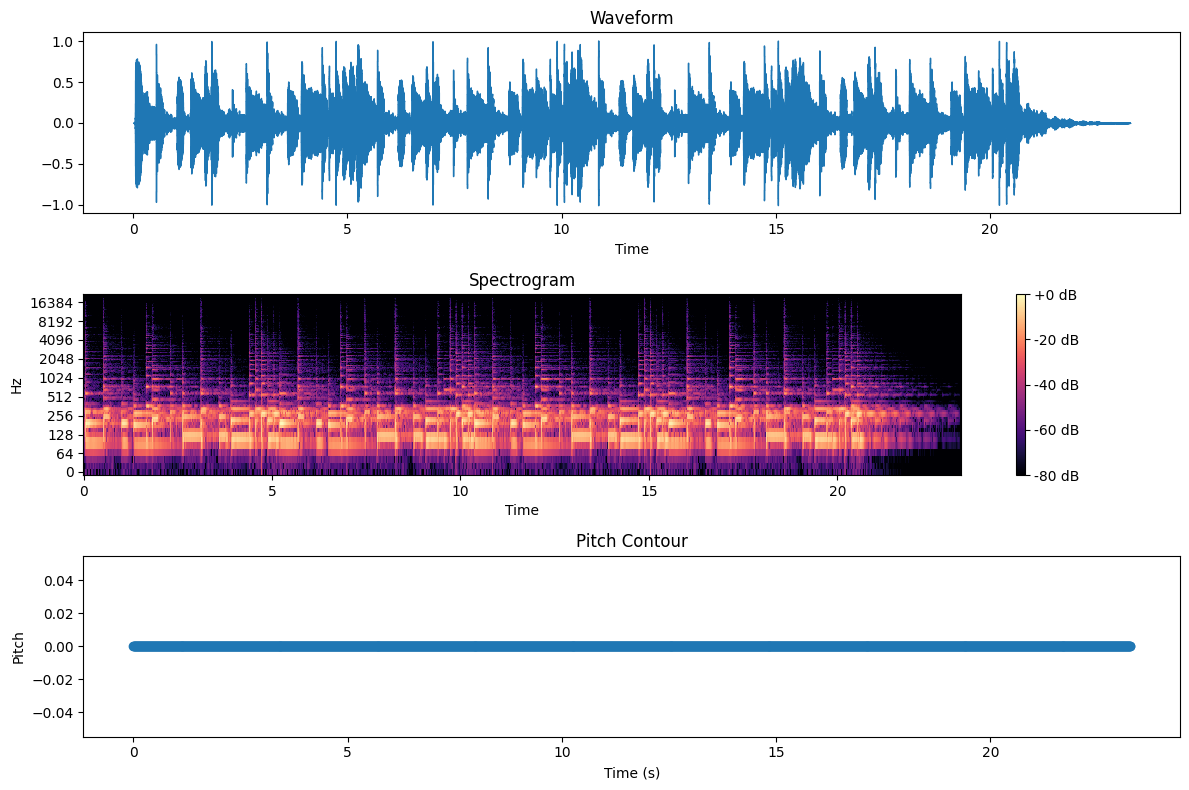

In [6]:
import librosa
import librosa.display
import numpy as np  # Import NumPy module
import matplotlib.pyplot as plt

# Load an audio file
file_path = 'file.wav'
signal, sr = librosa.load(file_path, sr=None)

# Calculate the Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(librosa.stft(signal), ref=np.max)

# Calculate pitch using the YIN algorithm
pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)
pitch = np.median(pitches, axis=0)

# Plot the multilevel speech resolution
plt.figure(figsize=(12, 8))

# Plot the waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveform')

# Plot the spectrogram
plt.subplot(3, 1, 2)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

# Plot the pitch contour
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(pitch)) * librosa.get_duration(y=signal, sr=sr) / len(pitch), pitch, 'o-')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('Pitch Contour')

plt.tight_layout()
plt.show()
